In this project we propose to make a comparative study of different
algorithms with different parameters as well as an approach to combine
the classification algorithms in order to improve the pre-obtained
result. A set of classifier models trained on the data set for model
building. 1. Data pre-processing is performed on the data set. 2. Graphs
are plotted using different instances and attributes. 3. Using different
classifiers, model building is performed using relevant attributes. 4. A
hybrid model consisting of three algorithms is applied to applied to
improve the result.

In \[36\]:

    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import itertools  
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.naive_bayes import GaussianNB
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import RidgeClassifier

In \[3\]:

    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn. preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn import model_selection
    from sklearn.model_selection import RepeatedStratifiedKFold
    from numpy import mean
    from numpy import std
    from sklearn.datasets import make_classification
    from sklearn.model_selection import cross_val_score
    from matplotlib import pyplot
    get_ipython().run_line_magic('matplotlib', 'inline')

In \[4\]:

    import seaborn as sns
    import statsmodels.api as sm
    get_ipython().run_line_magic('matplotlib', 'inline')
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In \[5\]:

    data = pd.read_csv(r"C:\Users\RIDA BAYI\Desktop\Autism\dataset\dataset/Toddler Autism dataset July 2018.csv")

In \[6\]:

    data.rename(columns={'Class/ASD Traits ': 'Class'}, inplace=True)

In \[7\]:

    data.head(5)

Out\[7\]:

|     | Case\_No | A1  | A2  | A3  | A4  | A5  | A6  | A7  | A8  | A9  | A10 | Age\_Mons | Qchat-10-Score | Sex | Ethnicity      | Jaundice | Family\_mem\_with\_ASD | Who completed the test | Class |
|-----|----------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----------|----------------|-----|----------------|----------|------------------------|------------------------|-------|
| 0   | 1        | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 0   | 1   | 28        | 3              | f   | middle eastern | yes      | no                     | family member          | No    |
| 1   | 2        | 1   | 1   | 0   | 0   | 0   | 1   | 1   | 0   | 0   | 0   | 36        | 4              | m   | White European | yes      | no                     | family member          | Yes   |
| 2   | 3        | 1   | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 0   | 1   | 36        | 4              | m   | middle eastern | yes      | no                     | family member          | Yes   |
| 3   | 4        | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 24        | 10             | m   | Hispanic       | no       | no                     | family member          | Yes   |
| 4   | 5        | 1   | 1   | 0   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 20        | 9              | f   | White European | no       | yes                    | family member          | Yes   |

In \[8\]:

    tmpData=data
    positiveData=tmpData[tmpData.Class == 'Yes']
    positiveData.head(5)

Out\[8\]:

|     | Case\_No | A1  | A2  | A3  | A4  | A5  | A6  | A7  | A8  | A9  | A10 | Age\_Mons | Qchat-10-Score | Sex | Ethnicity      | Jaundice | Family\_mem\_with\_ASD | Who completed the test | Class |
|-----|----------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----------|----------------|-----|----------------|----------|------------------------|------------------------|-------|
| 1   | 2        | 1   | 1   | 0   | 0   | 0   | 1   | 1   | 0   | 0   | 0   | 36        | 4              | m   | White European | yes      | no                     | family member          | Yes   |
| 2   | 3        | 1   | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 0   | 1   | 36        | 4              | m   | middle eastern | yes      | no                     | family member          | Yes   |
| 3   | 4        | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 24        | 10             | m   | Hispanic       | no       | no                     | family member          | Yes   |
| 4   | 5        | 1   | 1   | 0   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 20        | 9              | f   | White European | no       | yes                    | family member          | Yes   |
| 5   | 6        | 1   | 1   | 0   | 0   | 1   | 1   | 1   | 1   | 1   | 1   | 21        | 8              | m   | black          | no       | no                     | family member          | Yes   |

In \[9\]:

    sns.set(rc={'figure.figsize':(12,8.27)})

In \[10\]:

    sns.countplot(positiveData['Age_Mons'],label="Count")
    plt.show()

    C:\Users\RIDA BAYI\anaconda3\envs\rida\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      FutureWarning

![](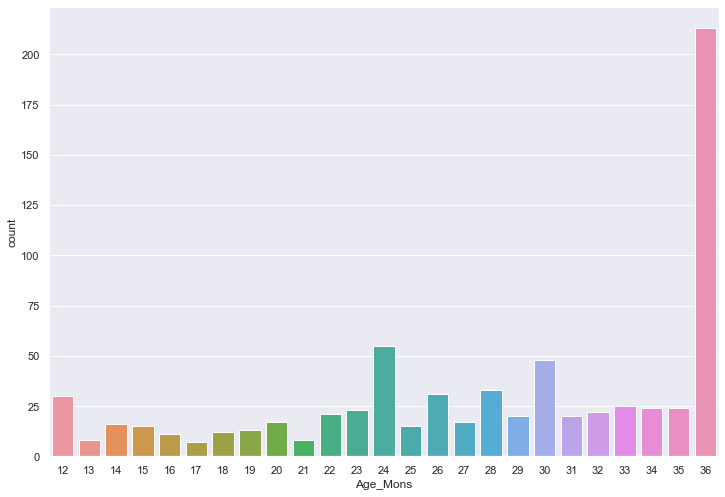%0A)

In \[11\]:

    sns.countplot(positiveData['Ethnicity'],label="Count")
    plt.show()

    C:\Users\RIDA BAYI\anaconda3\envs\rida\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      FutureWarning

![](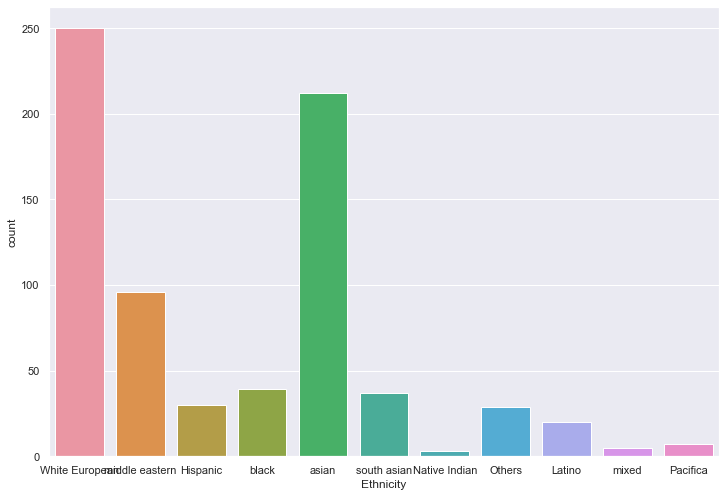%0A)

In \[12\]:

    import seaborn as sns
    sns.countplot(positiveData['Jaundice'],label="Count")
    plt.show()

    C:\Users\RIDA BAYI\anaconda3\envs\rida\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      FutureWarning

![](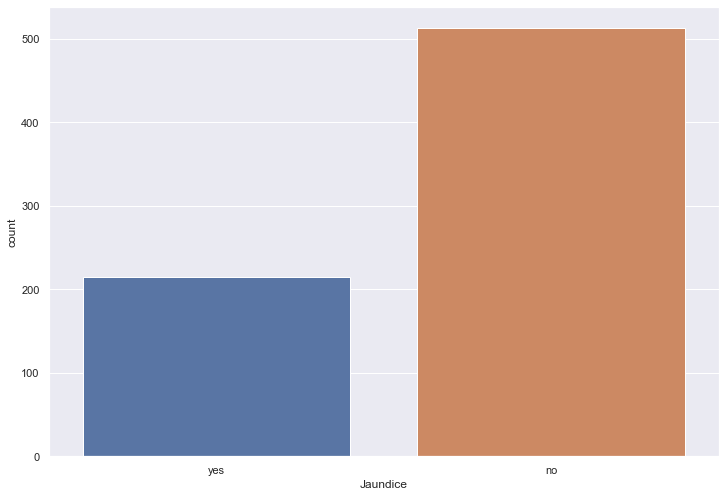%0A)

In \[13\]:

    import seaborn as sns
    sns.countplot(positiveData['Sex'],label="Count")
    plt.show()

    C:\Users\RIDA BAYI\anaconda3\envs\rida\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      FutureWarning

![](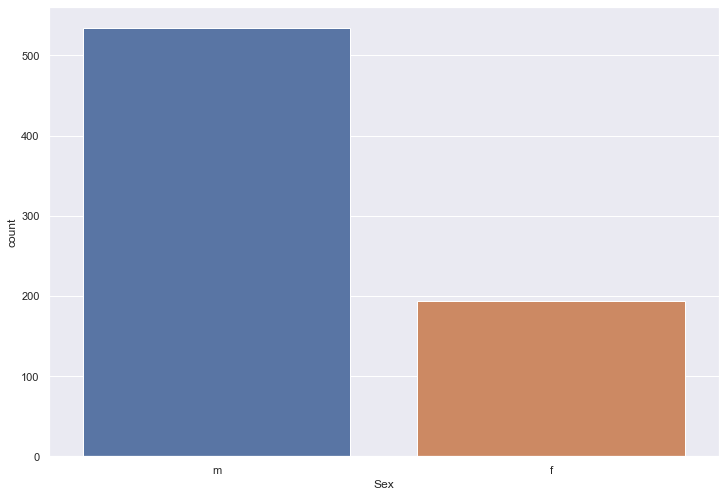%0A)

In \[14\]:

    data.drop('Case_No', inplace=True, axis=1)

In \[15\]:

    data.head(5)

Out\[15\]:

|     | A1  | A2  | A3  | A4  | A5  | A6  | A7  | A8  | A9  | A10 | Age\_Mons | Qchat-10-Score | Sex | Ethnicity      | Jaundice | Family\_mem\_with\_ASD | Who completed the test | Class |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----------|----------------|-----|----------------|----------|------------------------|------------------------|-------|
| 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 0   | 1   | 28        | 3              | f   | middle eastern | yes      | no                     | family member          | No    |
| 1   | 1   | 1   | 0   | 0   | 0   | 1   | 1   | 0   | 0   | 0   | 36        | 4              | m   | White European | yes      | no                     | family member          | Yes   |
| 2   | 1   | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 0   | 1   | 36        | 4              | m   | middle eastern | yes      | no                     | family member          | Yes   |
| 3   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 24        | 10             | m   | Hispanic       | no       | no                     | family member          | Yes   |
| 4   | 1   | 1   | 0   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 20        | 9              | f   | White European | no       | yes                    | family member          | Yes   |

In \[16\]:

    from sklearn import preprocessing 

In \[17\]:

    # label_encoder object knows how to understand word labels. 
    label_encoder = preprocessing.LabelEncoder() 
      
    # Encode labels in column 'Class/ASD Traits'. 
    data['Class']= label_encoder.fit_transform(data['Class']) 
    data['Who completed the test']= label_encoder.fit_transform(data['Who completed the test']) 
    data['Family_mem_with_ASD']= label_encoder.fit_transform(data['Family_mem_with_ASD']) 
    data['Jaundice']= label_encoder.fit_transform(data['Jaundice']) 
    data['Ethnicity']= label_encoder.fit_transform(data['Ethnicity']) 
    data['Sex']= label_encoder.fit_transform(data['Sex']) 

    data['Class'].unique() 

Out\[17\]:

    array([0, 1])

In \[18\]:

    X = data[['A1', 'A2', 'A3', 'A4','A5','A6','A7','A8','A9','A10',
           'Age_Mons', 'Qchat-10-Score', 
            'Sex', 'Ethnicity', 'Jaundice', 'Who completed the test']]
    X= np.asarray(X)
    y=np.asarray(data['Class'])

In \[19\]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In \[20\]:

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

In \[21\]:

    plt.figure(figsize=(12,10))
    cor = data.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

![](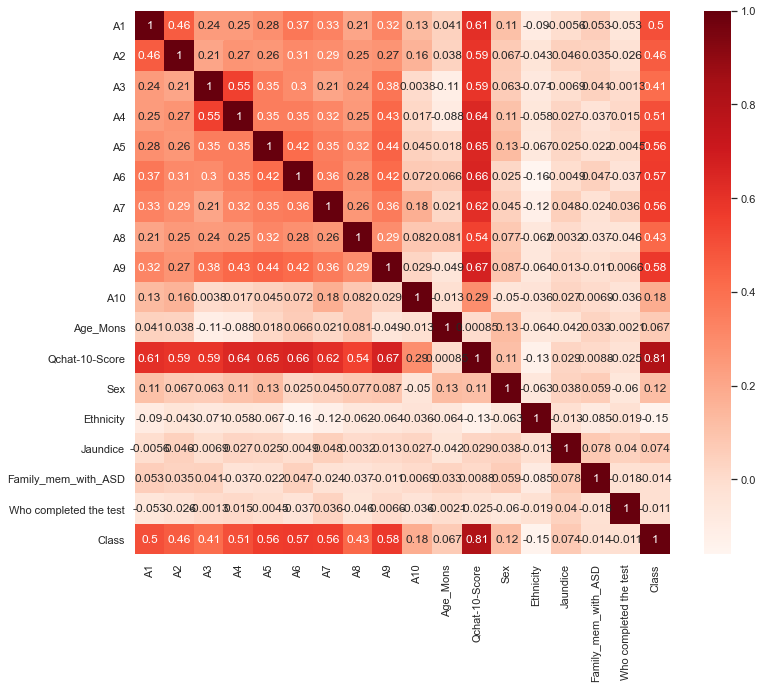%0A)

In \[22\]:

    # #Correlation with output variable
    cor_target = abs(cor["Class"])
    # #Selecting highly correlated features
    relevant_features = cor_target[cor_target>0.2]
    relevant_features

Out\[22\]:

    A1                0.503810
    A2                0.463467
    A3                0.409701
    A4                0.505204
    A5                0.563297
    A6                0.569424
    A7                0.563177
    A8                0.427155
    A9                0.577336
    Qchat-10-Score    0.810423
    Class             1.000000
    Name: Class, dtype: float64

In \[23\]:

    model1 =SVC(C=0.1, gamma='scale', kernel='rbf')
    model2 =  KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='uniform')
    model3 = GaussianNB()
    model4 = RandomForestRegressor(n_estimators=20, random_state=0)
    model5=LogisticRegression()

In \[24\]:

    model1.fit(X_train, y_train)
    model2.fit(X_train, y_train)
    model3.fit(X_train, y_train)
    model4.fit(X_train, y_train)
    model5.fit(X_train, y_train)

Out\[24\]:

    LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                       intercept_scaling=1, l1_ratio=None, max_iter=100,
                       multi_class='auto', n_jobs=None, penalty='l2',
                       random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                       warm_start=False)

In \[28\]:

    y_pred1 = model1.predict(X_test)
    y_pred2 = model2.predict(X_test)
    y_pred3 = model3.predict(X_test)
    y_pred4 = model4.predict(X_test)
    y_pred5 = model5.predict(X_test)

In \[29\]:

    cm_svm = confusion_matrix(y_test, y_pred1)
    cm_KNN = confusion_matrix(y_test, y_pred2)
    cm_NaiveBaye = confusion_matrix(y_test, y_pred3)
    cm_lr= confusion_matrix(y_test, y_pred5)

In \[31\]:

    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In \[49\]:

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred1)
    np.set_printoptions(precision=2)
    #print (classification_report(y_test, y_pred1))
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

    Confusion matrix, without normalization
    [[ 60   9]
     [  0 142]]

![](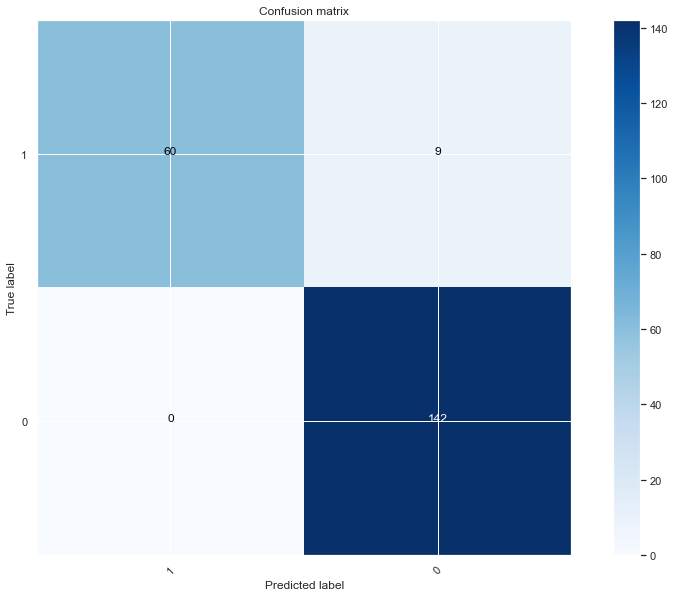%0A)

In \[47\]:

    cnf_matrix = confusion_matrix(y_test, y_pred2)
    np.set_printoptions(precision=2)
    #print (classification_report(y_test, y_pred1))
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

    Confusion matrix, without normalization
    [[ 67   2]
     [  7 135]]

![](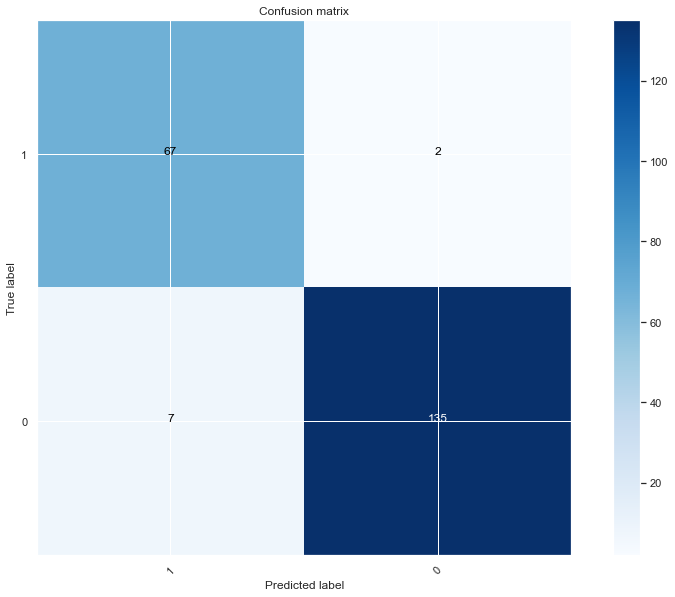%0A)

In \[ \]:

    # # Hybrid Model Using Stucking 

In \[79\]:

    def get_stacking():
        # define the base models
        level0 = list()
        #level0.append(('bayes', GaussianNB()))
        #level0.append(('lr', LogisticRegression()))
        level0.append(('svm', SVC(C=0.1, gamma='scale', kernel='rbf')))
        level0.append(('knn',  KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='uniform')))
        #level0.append(('svm2', SVC(C=0.1, gamma='scale', kernel='poly')))
        #level0.append(('svm3', SVC(C=0.1, gamma='scale', kernel='poly')))
        

        #level0.append(('cart', DecisionTreeClassifier(max_depth=2,criterion='entropy',random_state=0)))
        #level0.append(('rf', RandomForestRegressor()))
        # define meta learner model
        level1 =GaussianNB()
        # define the stacking ensemble
        modelHybrid = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
        return modelHybrid

In \[80\]:

    def get_models():
        models = dict()
        models['lr'] = LogisticRegression()
        models['svm'] = SVC(C=0.1, gamma='scale', kernel='poly')
        models['knn'] =  KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='uniform')
        models['bayes'] = GaussianNB()
        models['cart'] = DecisionTreeClassifier()
        models['stacking'] = get_stacking()
        return models

In \[81\]:

    def evaluate_model(model, X, y):
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        return scores

In \[82\]:

    names = list()

In \[91\]:

    names.append('lr')
    names.append('svm')
    names.append('Knn')
    names.append('bayes')
    names.append('cart')
    names.append('stacking')

In \[93\]:

    !pip install --upgrade scikit-learn

    Requirement already satisfied: scikit-learn in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (0.24.1)
    Collecting scikit-learn
      Downloading scikit_learn-0.24.2-cp37-cp37m-win_amd64.whl (6.8 MB)
    Requirement already satisfied: threadpoolctl>=2.0.0 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from scikit-learn) (2.1.0)
    Requirement already satisfied: numpy>=1.13.3 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from scikit-learn) (1.19.5)
    Requirement already satisfied: scipy>=0.19.1 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from scikit-learn) (1.6.1)
    Requirement already satisfied: joblib>=0.11 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from scikit-learn) (1.0.1)
    Installing collected packages: scikit-learn
      Attempting uninstall: scikit-learn
        Found existing installation: scikit-learn 0.24.1
        Uninstalling scikit-learn-0.24.1:
          Successfully uninstalled scikit-learn-0.24.1

    ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\rida bayi\\anaconda3\\envs\\rida\\lib\\site-packages\\~klearn\\.libs\\vcomp140.dll'
    Consider using the `--user` option or check the permissions.

In \[94\]:

    from sklearn.ensemble import StackingClassifier

In \[95\]:

    models = get_models()
    # evaluate the models and store results
    results = list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

    >lr 1.000 (0.000)
    >svm 0.870 (0.029)
    >knn 0.980 (0.012)
    >bayes 0.973 (0.016)
    >cart 1.000 (0.000)
    >stacking 0.976 (0.015)

In \[97\]:

    !pip install xgboost

    Collecting xgboost
      Downloading xgboost-1.4.1-py3-none-win_amd64.whl (97.8 MB)
    Requirement already satisfied: numpy in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from xgboost) (1.19.5)
    Requirement already satisfied: scipy in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from xgboost) (1.6.1)
    Installing collected packages: xgboost
    Successfully installed xgboost-1.4.1

In \[98\]:

    !pip install mlxtend

    Collecting mlxtend
      Downloading mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)
    Requirement already satisfied: setuptools in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from mlxtend) (52.0.0.post20210125)
    Requirement already satisfied: pandas>=0.24.2 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from mlxtend) (1.2.3)
    Requirement already satisfied: scikit-learn>=0.20.3 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from mlxtend) (0.24.2)
    Requirement already satisfied: numpy>=1.16.2 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from mlxtend) (1.19.5)
    Requirement already satisfied: scipy>=1.2.1 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from mlxtend) (1.6.1)
    Requirement already satisfied: joblib>=0.13.2 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from mlxtend) (1.0.1)
    Requirement already satisfied: matplotlib>=3.0.0 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from mlxtend) (3.3.4)
    Requirement already satisfied: python-dateutil>=2.1 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (2.8.1)
    Requirement already satisfied: cycler>=0.10 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (0.10.0)
    Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.3 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (2.4.7)
    Requirement already satisfied: pillow>=6.2.0 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (8.1.2)
    Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (1.3.1)
    Requirement already satisfied: six in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from cycler>=0.10->matplotlib>=3.0.0->mlxtend) (1.15.0)
    Requirement already satisfied: pytz>=2017.3 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from pandas>=0.24.2->mlxtend) (2021.1)
    Requirement already satisfied: threadpoolctl>=2.0.0 in c:\users\rida bayi\anaconda3\envs\rida\lib\site-packages (from scikit-learn>=0.20.3->mlxtend) (2.1.0)
    Installing collected packages: mlxtend
    Successfully installed mlxtend-0.18.0

In \[99\]:

    # # Hybrid Model using Voting
    from mlxtend.classifier import EnsembleVoteClassifier
    from xgboost import XGBClassifier
    from sklearn import metrics

In \[100\]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In \[101\]:

    lr=LogisticRegression(C= 1.0, penalty= 'l2', solver= 'newton-cg')#79 liblinear
       
    KNN = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 19, weights = 'uniform') 
        
    REGC=RidgeClassifier(alpha= 0.1)
    dt= DecisionTreeClassifier()
    svmc = SVC(C =1.0, gamma = 'scale', kernel= 'rbf')
    bayes=GaussianNB()

In \[102\]:

    Modele_Global= EnsembleVoteClassifier(clfs=[dt,KNN,bayes],voting='hard')

In \[103\]:

    Modele_Global.fit(X_train,y_train)

Out\[103\]:

    EnsembleVoteClassifier(clfs=[DecisionTreeClassifier(),
                                 KNeighborsClassifier(metric='euclidean',
                                                      n_neighbors=19),
                                 GaussianNB()])

In \[104\]:

    y_predict = Modele_Global.predict(X_test)

In \[105\]:

    print(metrics.accuracy_score(y_test,y_predict))

    0.995260663507109

In \[ \]: